In [1]:
import pandas as pd
import geopandas as gpd
import shapely
from shapely.geometry import Point
from shapely.geometry import shape 
from shapely.geometry import Polygon
from descartes import PolygonPatch
from geopandas.tools import sjoin

In [35]:
sd_div = gpd.read_file('ca_san_diego_shapefiles/pd_divisions_datasd.geojson')

In [33]:
sd_div2 = gpd.read_file('ca_san_diego_shapefiles/divisions_datasd.shp')

In [ ]:
pd.read_csv('')

In [37]:
sd_div

,objectid,div_num,div_name,geometry
0,1,1,NORTHERN,"POLYGON ((-117.18640 32.86097, -117.18470 32.8..."
1,2,2,NORTHEASTERN,"POLYGON ((-117.00500 32.87485, -117.00501 32.8..."
2,3,3,EASTERN,"POLYGON ((-117.00500 32.87485, -117.00513 32.8..."
3,4,4,SOUTHEASTERN,"POLYGON ((-117.05128 32.74246, -117.05125 32.7..."
4,5,5,CENTRAL,"POLYGON ((-117.11780 32.71713, -117.11778 32.7..."
5,6,6,WESTERN,"POLYGON ((-117.15525 32.80188, -117.15525 32.8..."
6,7,7,SOUTHERN,"POLYGON ((-117.11888 32.60730, -117.11877 32.6..."
7,8,8,MID-CITY,"POLYGON ((-117.03898 32.76960, -117.03895 32.7..."
8,9,9,NORTHWESTERN,"POLYGON ((-117.09962 32.99798, -117.09962 32.9..."


<AxesSubplot:>

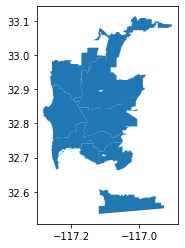

In [36]:
sd_div.plot()

<AxesSubplot:>

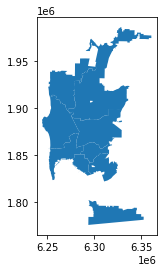

In [34]:
sd_div2.plot()

In [29]:
sd_data = pd.read_csv('ca_san_diego_2020_04_01.csv')

In [32]:
sd_data['service_area']

0             110
1             320
2             320
3             610
4             930
           ...   
383022        620
383023        710
383024        720
383025        810
383026    Unknown
Name: service_area, Length: 383027, dtype: object

In [24]:
sd_div2

,objectid,div_num,div_name,geometry
0,1,1,NORTHERN,"POLYGON ((6257399.474 1913720.405, 6258021.781..."
1,2,2,NORTHEASTERN,"POLYGON ((6329136.046 1985638.386, 6329132.056..."
2,3,3,EASTERN,"POLYGON ((6323355.804 1898933.226, 6324130.958..."
3,4,4,SOUTHEASTERN,"POLYGON ((6314753.250 1851441.908, 6314774.253..."
4,5,5,CENTRAL,"POLYGON ((6287304.000 1850636.000, 6287303.000..."
5,6,6,WESTERN,"POLYGON ((6280788.358 1873275.706, 6280793.053..."
6,7,7,SOUTHERN,"POLYGON ((6294084.233 1801858.103, 6294115.999..."
7,8,8,MID-CITY,"POLYGON ((6300696.000 1863112.000, 6300797.593..."
8,9,9,NORTHWESTERN,"POLYGON ((6290347.459 1952824.477, 6290674.051..."


In [18]:
import geojson
with open(path_to_file) as f:
    gj = geojson.load(f)

,objectid,div_num,div_name,geometry
0,1,1,NORTHERN,"POLYGON ((6257399.474 1913720.405, 6258021.781..."
1,2,2,NORTHEASTERN,"POLYGON ((6329136.046 1985638.386, 6329132.056..."
2,3,3,EASTERN,"POLYGON ((6323355.804 1898933.226, 6324130.958..."
3,4,4,SOUTHEASTERN,"POLYGON ((6314753.250 1851441.908, 6314774.253..."
4,5,5,CENTRAL,"POLYGON ((6287304.000 1850636.000, 6287303.000..."
5,6,6,WESTERN,"POLYGON ((6280788.358 1873275.706, 6280793.053..."
6,7,7,SOUTHERN,"POLYGON ((6294084.233 1801858.103, 6294115.999..."
7,8,8,MID-CITY,"POLYGON ((6300696.000 1863112.000, 6300797.593..."
8,9,9,NORTHWESTERN,"POLYGON ((6290347.459 1952824.477, 6290674.051..."


In [10]:
census = pd.read_csv('intercensal_estimates.csv')
sd_fips = 6073

In [11]:
sd = census[(census['state']=='California')&(census['fips']==sd_fips)]

In [14]:
sd

,state,fips,year,age,race,gender,count
13320,California,6073,2010,16-19,Asian,F,8194.0
13321,California,6073,2010,16-19,Asian,M,8686.0
13322,California,6073,2010,16-19,Black,F,4473.0
13323,California,6073,2010,16-19,Black,M,5302.0
13324,California,6073,2010,16-19,Hispanic,F,37519.0
...,...,...,...,...,...,...,...
242035,California,6073,2015,50+,Hispanic,M,97804.0
242036,California,6073,2015,50+,Other,F,11784.0
242037,California,6073,2015,50+,Other,M,10875.0
242038,California,6073,2015,50+,White,F,325109.0


In [15]:
pd.read_csv('ppcs.tsv', sep='\t')

,SCRMCTRL,SAMPLE,QTYPE,PPCSWGT,PPCSWGT2008,PPCSWGT2011,SEQNUM,SEX,AGE,HISP,...,V498,V499,V500,V501,V502,V503,V504,V505,V506,V507
0,20282942493845765667,25,0,0.00000,0.00000,0.00000,1,1,16,2,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
1,29422828925847913844,25,0,6594.89135,44676.28515,0.00000,2,1,19,2,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
2,29538237489045919078,25,0,6594.89135,44676.28515,0.00000,3,1,20,2,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
3,29289393349247917944,26,0,0.00000,0.00000,0.00000,4,1,20,2,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
4,20882953188745919467,25,0,0.00000,0.00000,0.00000,5,1,22,2,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62275,29823753996791919932,26,1,7473.97515,0.00000,8777.57546,62276,2,80,2,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
62276,29284288151047912157,25,1,7756.77421,0.00000,9109.69994,62277,2,79,2,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
62277,29880429145941916138,26,1,8016.29283,0.00000,9414.48344,62278,2,75,2,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
62278,29428893839219918338,25,1,6387.33843,0.00000,7501.40908,62279,2,76,2,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


**Automated PDF Parsing**

In [42]:
# !pip install pdfreader

In [44]:
pdfreader

<module 'pdfreader' from 'C:\\Users\\jdlevy\\Anaconda3\\lib\\site-packages\\pdfreader\\__init__.py'>

In [45]:
# df['div_num'] = df['division'].replace()

HTTPError: HTTP Error 404: Not Found

In [5]:
import os
from pdfreader import SimplePDFViewer
from tqdm import tqdm
tqdm.pandas()

import pdfreader
import urllib.request

sd = pd.read_csv('ca_san_diego_2020_04_01.csv')


def get_total_population(year, div_num):
    fname = f'sd_data/{year}/sd_pop_division_{div_num}.pdf'
    fd = open(fname, 'rb')
    viewer = SimplePDFViewer(fd)
    viewer.render()
    return int(viewer.canvas.strings[3].replace(',',''))
# Convert service areas to division
unaccounted_service_areas = list(set(sd.service_area.unique()) - set(['110', '120', '230', 
                                     '240', '310', '320', 
                                     '430', '440', '510', 
                                     '520', '530', '610', 
                                     '620', '710', '720',
                                     '810', '820', '830', 
                                      '930']))

map_division_name = {
    '110' : 'Northern',
    '120' : 'Northern',
    '230' : 'Northeastern',
    '240' : 'Northeastern', 
    '310' : 'Eastern',
    '320' : 'Eastern',
    '430' : 'Southeastern',
    '440' : 'Southeastern',
    '510' : 'Central',
    '520' : 'Central', 
    '530' : 'Central', 
    '610' : 'Western',
    '620' : 'Western',
    '710' : 'Southern',
    '720' : 'Southern',
    '810' : 'Midcity',
    '820' : 'Midcity',
    '830' : 'Midcity',
    '930' : 'Northwestern'
}

sd = sd[~sd['service_area'].isin(unaccounted_service_areas)]
sd = sd.replace({'service_area': map_division_name})
sd = sd.rename(columns={'service_area': 'division'})
sd['division'] = sd['division'].str.upper()
map_division_num = {
    'NORTHERN' : 1, 
    'NORTHEASTERN' : 2, 
    'EASTERN' : 3, 
    'SOUTHEASTERN' : 4, 
    'CENTRAL' : 5, 
    'WESTERN' : 6, 
    'SOUTHERN' : 7, 
    'MIDCITY' : 8,
    'NORTHWESTERN' : 9
}


sd['div_num'] = sd.loc[:, 'division']
sd = sd.replace({'div_num': map_division_num})

# clean up data
sd['date'] =  pd.to_datetime(sd['date'], format='%Y-%m-%d')
sd = sd.dropna(subset=['date'])

# determine crime
sd['fruitful_search'] = sd[['arrest_made', 'citation_issued', 'contraband_found']].any(axis=1)

pdf_path = ""
def download_file(download_url, filename):
    response = urllib.request.urlopen(download_url)    
    file = open(filename + ".pdf", 'wb')
    file.write(response.read())
    file.close()

# if os.path.isdir('sd_data') == False: os.mkdir('sd_data')
# for year in range(2014, 2017):
#     if os.path.isdir(f'sd_data/{year}') == False: os.mkdir(f'sd_data/{year}')
#     for division in range(1, 10):
#         url = f'https://datasurfer.sandag.org/download/sandag_estimate_{year}_sdcouncil_{division}.pdf'
#         download_file(url, f'sd_data/{year}/sd_pop_division_{division}')

# get year
sd['year'] = sd['date'].dt.year

sd = sd[sd['year']!=2017].reset_index(drop=True)

sd_pop = sd[['year', 'div_num']].drop_duplicates().sort_values(by=['year', 'div_num']).reset_index(drop=True)
sd_pop['total_population'] = sd_pop.progress_apply(lambda x: get_total_population(x['year'], x['div_num']), axis=1)

sd['total_pop'] =  sd.loc[:, ['year', 'div_num']].merge(sd_pop).loc[:, 'total_population']

C:\Users\jdlevy\Anaconda3\lib\site-packages\tqdm\std.py:706: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  5.45it/s]


In [90]:
from tqdm import tqdm
tqdm.pandas()

def get_total_population(year, div_num):
    fname = f'sd_data/{year}/sd_pop_division_{div_num}.pdf'
    fd = open(fname, 'rb')
    viewer = SimplePDFViewer(fd)
    viewer.render()
    return int(viewer.canvas.strings[3].replace(',',''))

C:\Users\jdlevy\Anaconda3\lib\site-packages\tqdm\std.py:706: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [82]:
def get_total_population(year, div_num):
    fname = f'sd_data/{year}/sd_pop_division_{div_num}.pdf'
    fd = open(fname, 'rb')
    viewer = SimplePDFViewer(fd)
    viewer.render()
    return int(viewer.canvas.strings[3].replace(',',''))

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  5.49it/s]


0         158153
1         158153
2         158153
3         158153
4         158153
           ...  
344233    147891
344234    147891
344235    147891
344236    147891
344237    147891
Name: total_population, Length: 344238, dtype: int64

In [98]:
sd.reset_index(drop=True)

,raw_row_number,date,time,division,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,search_vehicle,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description,div_num,fruitful_search,year,total_pop
0,1,2014-01-01,01:25:00,NORTHERN,24.0,white,male,vehicular,False,True,...,False,NaN,NaN,Moving Violation,Citation,WHITE,1,True,2014,158153.0
1,2,2014-01-01,05:47:00,EASTERN,42.0,white,male,vehicular,False,False,...,False,NaN,NaN,Moving Violation,Verbal Warning,WHITE,3,False,2014,158153.0
2,3,2014-01-01,07:46:00,EASTERN,29.0,asian/pacific islander,male,vehicular,False,False,...,False,NaN,NaN,Moving Violation,Verbal Warning,LAOTIAN,3,False,2014,158153.0
3,4,2014-01-01,08:10:00,WESTERN,23.0,white,male,vehicular,False,True,...,False,NaN,NaN,Moving Violation,Citation,WHITE,6,True,2014,158153.0
4,5,2014-01-01,08:35:00,NORTHWESTERN,35.0,hispanic,male,vehicular,False,True,...,False,NaN,NaN,Equipment Violation,Citation,HISPANIC,9,True,2014,158153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344233,54680,2014-04-29,NaN,NORTHEASTERN,NaN,NaN,NaN,vehicular,False,NaN,...,False,NaN,NaN,NaN,NaN,NaN,2,False,2014,NaN
344234,187162,2015-05-11,NaN,EASTERN,NaN,NaN,NaN,vehicular,False,True,...,False,NaN,NaN,Moving Violation,Citation,NaN,3,True,2015,NaN
344235,49032,2014-04-17,NaN,SOUTHEASTERN,NaN,NaN,NaN,vehicular,NaN,NaN,...,False,NaN,NaN,Moving Violation,NaN,NaN,4,False,2014,NaN
344236,84616,2014-07-11,NaN,CENTRAL,NaN,NaN,NaN,vehicular,NaN,NaN,...,False,NaN,NaN,Moving Violation,NaN,NaN,5,False,2014,NaN


In [69]:
year = 2014
division = 1

for year in range(2014, 2017):
    for division in range(1, 10):
        fname =  f'sd_data/{year}/sd_pop_division_{division}.pdf'
        get_total_population(fname)

158,153
154,575
164,633
139,207
152,970
144,302
154,473
145,073
148,077
161,122
156,874
176,014
138,500
156,172
147,791
157,051
145,864
148,108
163,157
158,095
180,865
137,994
156,673
147,891
160,317
145,208
147,969


In [46]:




download_file('https://datasurfer.sandag.org/download/sandag_estimate_2014_sdcouncil_1.pdf', "Test")
